In [2]:
import torch
import torchvision
import pandas as pd
import numpy as np
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

from torch import nn
from torch import optim

import torch.nn.functional as F

from collections import OrderedDict

In [3]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, images_path):
        self.dataframe = dataframe
        self.images_path = images_path

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        
        img = Image.open(self.images_path + str(index).zfill(4) + '.jpg')
#         img = img.resize((224,224), Image.ANTIALIAS)
        
        return (
            torchvision.transforms.functional.to_tensor(img),
            row["data"],
        )

In [4]:

test_df = pd.read_csv('test_steer.csv')
test_dataset = Dataset(test_df, '../catkin_ws/images/test_images/left')
dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'test_steer.csv'

In [23]:
model = torch.load('unbalanced_model')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [24]:
example = torch.rand(1,3, 120, 320).to(device)
traced_script_module = torch.jit.trace(model, example)

In [25]:
# output = traced_script_module(torch.ones(1, 3, 120, 320).to(device))
traced_script_module.save('unbalanced.pt')

In [14]:
model.eval();

In [14]:
def test(model, trainloader):
    train_loss =[]
    
    running_loss =0
    for images, labels in trainloader:
        inputs, labels = images.to(device), labels.to(device)

        out = model(inputs)
#         print(out)
        running_loss += torch.sum(torch.square(out - labels))

    print(running_loss)

tensor([[-0.4081]], device='cuda:0', grad_fn=<TanhBackward>) tensor([-0.5050], dtype=torch.float64)


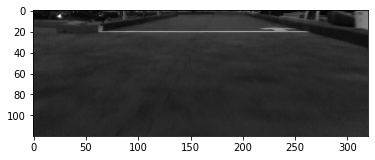

In [41]:
torch.no_grad()
img, true_l = next(iter(dataloader))
pred = model(img.to(device))
plt.imshow(img[0].permute(1, 2, 0))
print(pred, true_l)

In [29]:
test(model, dataloader)

KeyboardInterrupt: 

In [21]:
# An instance of your model.
model = torchvision.models.resnet18()

# An example input you would normally provide to your model's forward() method.
example = torch.rand(1, 3, 224, 224)

# Use torch.jit.trace to generate a torch.jit.ScriptModule via tracing.
traced_script_module = torch.jit.trace(model, example)

In [22]:
traced_script_module.save("traced_resnet_model.pt")


In [6]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
model.eval()
img = Image.open('../../../../catkin_ws/images/test/left0000.jpg')
torch_img = torchvision.transforms.functional.to_tensor(img)
print(torch_img)
model(torch_img.reshape(1,3,120,320).to(device))

tensor([[[0.0941, 0.0902, 0.0824,  ..., 0.5373, 0.3176, 0.0510],
         [0.0941, 0.0863, 0.1059,  ..., 0.5412, 0.2745, 0.0627],
         [0.0745, 0.0941, 0.0784,  ..., 0.5098, 0.2314, 0.0627],
         ...,
         [0.1490, 0.1569, 0.1569,  ..., 0.1529, 0.1608, 0.1608],
         [0.1490, 0.1569, 0.1569,  ..., 0.1647, 0.1686, 0.1686],
         [0.1490, 0.1608, 0.1569,  ..., 0.1686, 0.1686, 0.1725]],

        [[0.0941, 0.0902, 0.0824,  ..., 0.5373, 0.3176, 0.0510],
         [0.0941, 0.0863, 0.1059,  ..., 0.5412, 0.2745, 0.0627],
         [0.0745, 0.0941, 0.0784,  ..., 0.5098, 0.2314, 0.0627],
         ...,
         [0.1490, 0.1569, 0.1569,  ..., 0.1529, 0.1608, 0.1608],
         [0.1490, 0.1569, 0.1569,  ..., 0.1647, 0.1686, 0.1686],
         [0.1490, 0.1608, 0.1569,  ..., 0.1686, 0.1686, 0.1725]],

        [[0.0941, 0.0902, 0.0824,  ..., 0.5373, 0.3176, 0.0510],
         [0.0941, 0.0863, 0.1059,  ..., 0.5412, 0.2745, 0.0627],
         [0.0745, 0.0941, 0.0784,  ..., 0.5098, 0.2314, 0.

tensor([[-0.1703]], device='cuda:0', grad_fn=<TanhBackward>)